# Correlation using Python

In [47]:
#importing libraries to be used 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
from matplotlib import pylab as plt
plt.style.use ('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

dataframe = pd.read_csv(r'C:\Users\Pankaj Chettri\Desktop\Work\PYTHON\Jupyter\movies.csv')

dataframe.shape
dataframe.head()

,name,rating,Released_Year,Address,genre,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,"June 13, 1980",United States,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,"July 2, 1980",United States,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980",United States,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,"July 2, 1980",United States,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,"July 25, 1980",United States,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# checking the total null values

dataframe.isnull().sum()

name                0
rating             77
Released_Year       2
Address             2
genre               0
score               3
votes               3
director            0
writer              3
star                1
country             3
budget           2171
gross             189
company            17
runtime             4
dtype: int64

In [25]:
#Column Datatypes 

dataframe.dtypes

name              object
rating            object
Released_Year     object
genre             object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget             int64
gross              int64
company           object
runtime          float64
dtype: object

In [ ]:
# 4 Methods: to handle null values, 
# i) - FillNa()
# ii) - DropNa()
#iii) - Replace()
#iv) - Interpolate()

In [6]:
#Using Interpolate() method, but in the same dataframe, though saving in a new dataframe and using it, is more preferable. 

dataframe['rating'] = dataframe['rating'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['gross'] = dataframe['gross'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['budget'] = dataframe['budget'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['Released_Year'] = dataframe['Released_Year'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['score'] = dataframe['score'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['votes'] = dataframe['votes'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['writer'] = dataframe['writer'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['star'] = dataframe['star'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['country'] = dataframe['country'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['company'] = dataframe['company'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['gross'] = dataframe['gross'].interpolate(method = 'linear', limit_direction = 'forward')
dataframe['runtime'] = dataframe['runtime'].interpolate(method = 'linear', limit_direction = 'forward')

In [7]:
#columns datatype change

dataframe['gross'] = dataframe['gross'].astype('int64')

dataframe['budget'] = dataframe['budget'].astype('int64')

In [8]:
dataframe.isnull().sum()
dataframe = dataframe.fillna(value=0)

In [10]:
dataframe.isnull().sum().sum()

0

In [11]:
# viewing all dataset

pd.set_option('display.max_rows', None)

#sorting with respect to gross

dataframe= dataframe.sort_values(by=['gross'],ascending = False)

dataframe=dataframe.drop(columns=['Address'])

<function matplotlib.pyplot.show(close=None, block=None)>

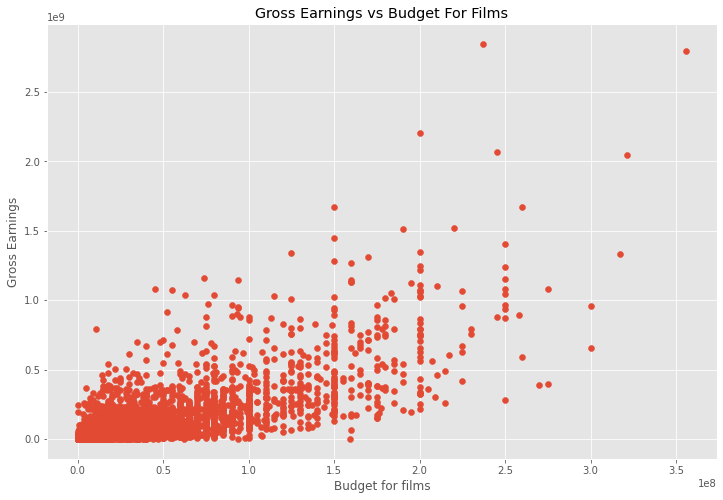

In [48]:
# Finding the Correlation, budget on gross = high

#creating scatter plot

plt.scatter(x = dataframe['budget'], y = dataframe['gross'])
plt.title('Gross Earnings vs Budget For Films')
plt.xlabel('Budget for films')
plt.ylabel('Gross Earnings')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

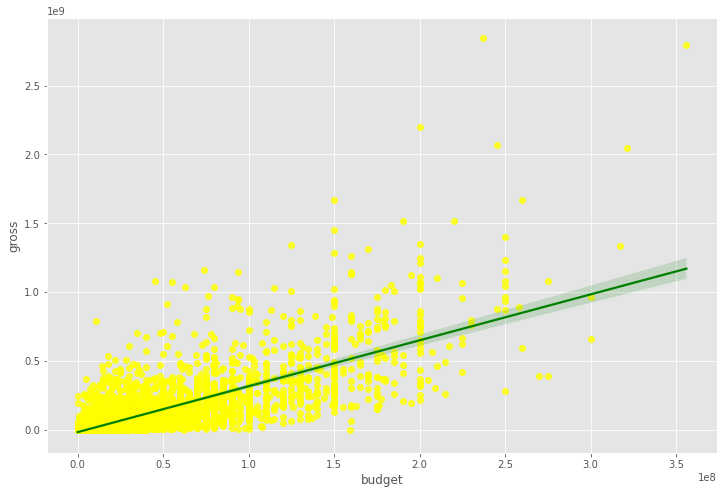

In [54]:
dataframe

#regression plot via. seaborn

sns.regplot(x='budget', y='gross', data = dataframe, scatter_kws= {"color":"yellow"}, line_kws={"color":"green"}  )

In [24]:
#checking correlation (Pearson's Method : Default), others usually used are kendall, spearman and point - biserial  


dataframe.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.409263,0.082429,0.186022,0.399309
votes,0.409263,1.000000,0.449039,0.631278,0.309132
budget,0.082429,0.449039,1.000000,0.705326,0.271548
gross,0.186022,0.631278,0.705326,1.000000,0.243642
runtime,0.399309,0.309132,0.271548,0.243642,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

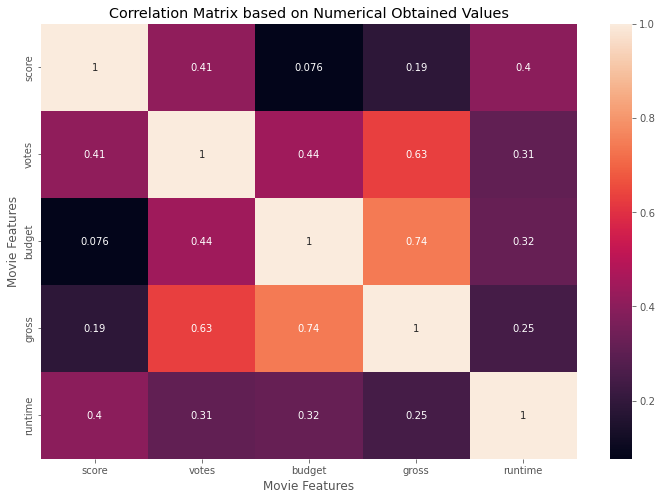

In [49]:
# correlation matrix

correlation_matrix = dataframe.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix based on Numerical Obtained Values")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show

In [53]:
# finding correlation based on non- numeric values 

datafnumber = dataframe

for col in datafnumber:
    if datafnumber[col].dtypes =='object':
        datafnumber[col] = datafnumber[col].astype('category')
        datafnumber[col] = datafnumber[col].cat.codes
        
datafnumber.head()

,name,rating,Released_Year,Address,genre,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,1513,56,6,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2318,146.0
1,5573,6,1311,56,1,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,729,104.0
2,5142,4,1568,56,0,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1539,124.0
3,286,4,1311,56,4,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1811,88.0
4,1027,6,1360,56,4,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1776,98.0


<function matplotlib.pyplot.show(close=None, block=None)>

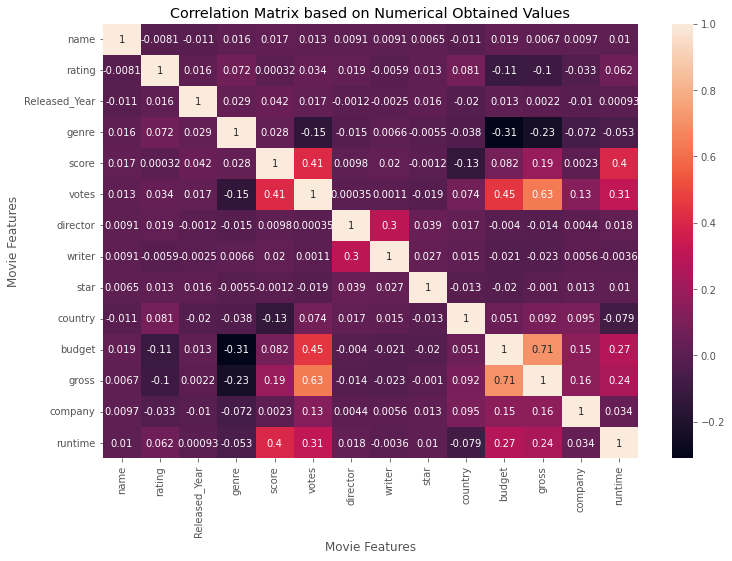

In [52]:
# correlation matrix

correlation_matrix1 = datafnumber.corr()

sns.heatmap(correlation_matrix1, annot = True)

plt.title("Correlation Matrix based on Numerical Obtained Values")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show

In [51]:
dataframe.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.399451,0.309212,0.320447,0.245216,1.000000


In [55]:
#clearer approach

data_correlation_clear = datafnumber.corr()
data_preview_correlation_pair = data_correlation_clear.unstack()

#more clearer approach 

dpcp = data_preview_correlation_pair.sort_values(ascending = False)
dpcp

# to see a conditioned view (high correlation), 
high_correlation = dpcp[(dpcp)>0.5]

high_correlation

# So, can conclude saying Budget and Votes have the highest Correlation to Gross Earnings.

name           name             1.000000
rating         rating           1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
votes          votes            1.000000
score          score            1.000000
genre          genre            1.000000
Address        Address          1.000000
Released_Year  Released_Year    1.000000
director       director         1.000000
runtime        runtime          1.000000
budget         gross            0.740395
gross          budget           0.740395
votes          gross            0.630757
gross          votes            0.630757
dtype: float64